# Transformações dos Dados

In [36]:
%run services/imports.py
%run services/visualization.py

In [37]:
visualizacao = Visualizacao()

In [38]:
%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import plotly.express as px
import seaborn as sns
import import_ipynb
import services.lista_estados_regioes as ler
import services.visualization as view
import services.lista_estados_regioes as lesr

CPU times: total: 0 ns
Wall time: 0 ns


In [39]:
dataset = pd.read_csv('dados/dataset_poscompTeste.csv')

In [40]:
dataset['CARGO'].unique()

array(['Mestrado/Doutorado'], dtype=object)

## Adicionar os eixos e somar de cada candidato

In [41]:
dataset = dataset.rename(columns={'PRESENTE DIA1': 'PRESENTE'})

In [42]:
#Aqui estou adicionando as regioes dos estados brasileiros
for i in lesr.regioes_brasil_siglas:
    dataset.loc[dataset['ESTADO'].isin(lesr.regioes_brasil_siglas[i]), 'REGIAO'] = i

In [43]:
dados_poscomp = dataset.drop_duplicates(subset='INSCRICAO', keep='first')
dados_poscomp = dados_poscomp.set_index('INSCRICAO')

In [44]:
estados_brasileiros = {0: 'AC',
           1: 'AL',
           2: 'AM',
           3: 'AP',
           4: 'BA',
           5: 'CE',
           6: 'DF',
           7: 'ES',
           8: 'GO',
           9: 'MA',
           10: 'MG',
           11: 'MS',
           12: 'MT',
           13: 'PA',
           14: 'PB',
           15: 'PE',
           16: 'PI',
           17: 'PR',
           18: 'RJ',
           19: 'RN',
           20: 'RO',
           21: 'RR',
           22: 'RS',
           23: 'SC',
           24: 'SP',
           25: 'SE',
           26: 'TO'}

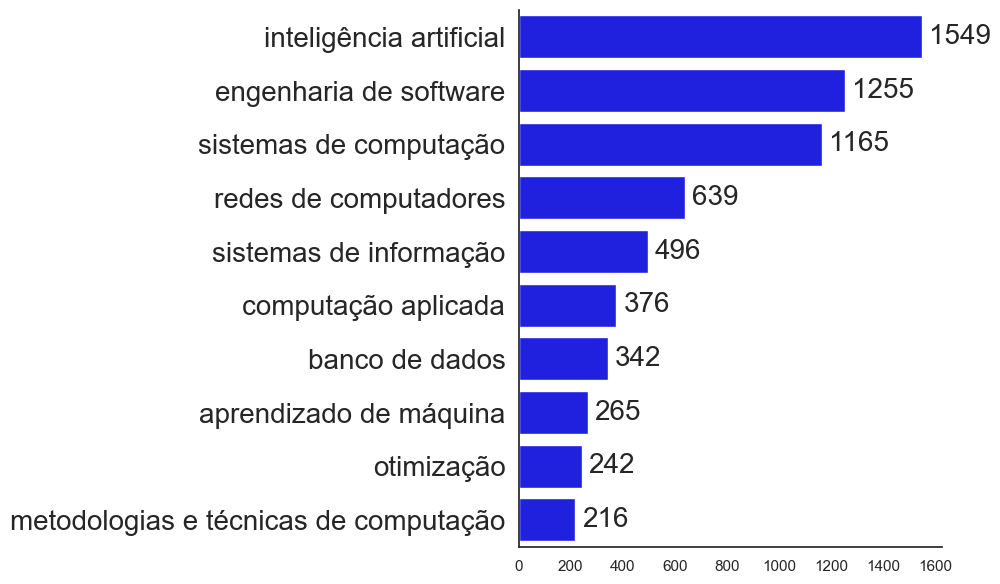

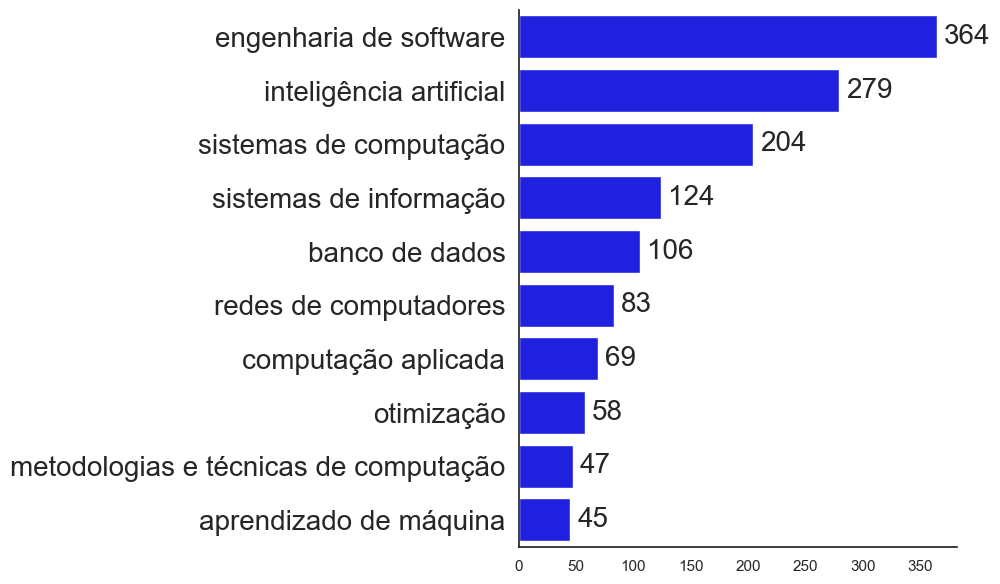

In [45]:
visualizacao.plot_top_especialidades_por_sexo(dados_poscomp, 'M', top_n=10, save_path='imagens/espec_masculino.eps')
visualizacao.plot_top_especialidades_por_sexo(dados_poscomp, 'F', top_n=10, save_path='imagens/espec_feminino.eps')

In [46]:
media_hist = dados_poscomp.query('PRESENTE == "S"')

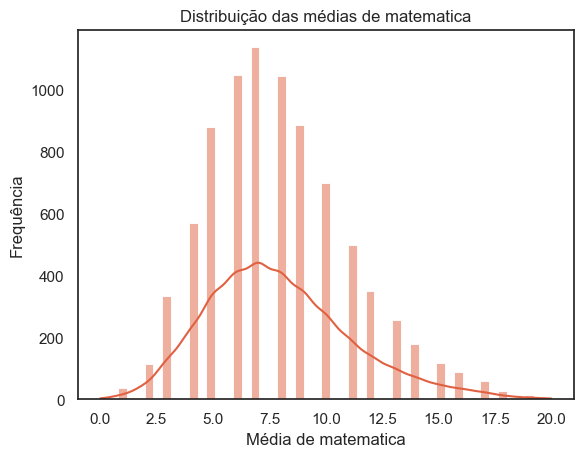

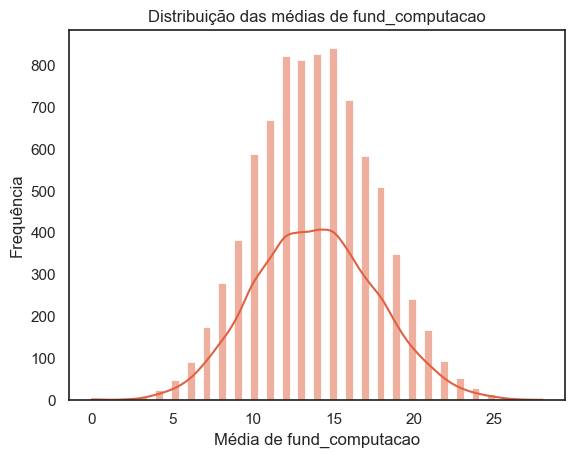

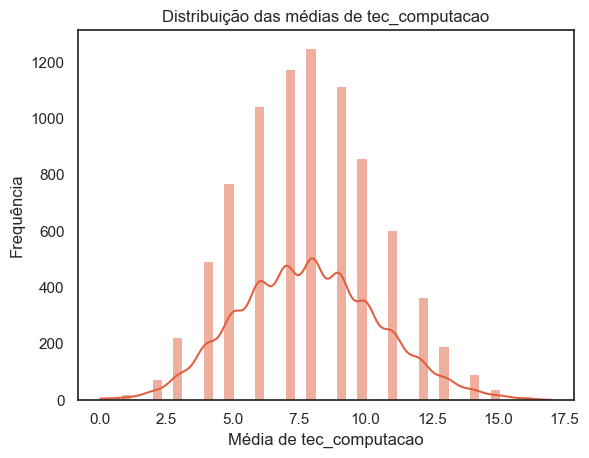

In [47]:
def plot_histogram(dataset, columns):
    for column in columns:
        sns.histplot(dataset[column], kde=True)
        plt.xlabel(f'Média de {column}')
        plt.ylabel('Frequência')
        plt.title(f'Distribuição das médias de {column}')
        plt.show()

columns = ['matematica', 'fund_computacao', 'tec_computacao']
plot_histogram(media_hist, columns)

In [48]:
media = dados_poscomp['total'].mean()
desvio_padrao = dados_poscomp['total'].std()
variancia = dados_poscomp['total'].var()

In [49]:
print(f'Média: {media}, Desvio Padrão: {desvio_padrao}, Variância: {variancia}')

Média: 29.629971250598945, Desvio Padrão: 7.495040340815135, Variância: 56.17562971044625


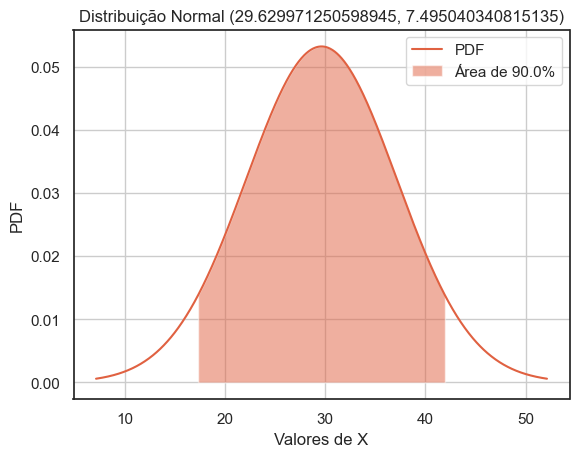

Intervalo de 90.0% de probabilidade: [17.30, 41.96]


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Probabilidade desejada
probabilidade = 0.90

# Encontre os valores de X correspondentes ao intervalo de probabilidade
limite_inferior, limite_superior = norm.interval(probabilidade, loc=media, scale=desvio_padrao)

# Valores para o gráfico
x = np.linspace(media - 3 * desvio_padrao, media + 3 * desvio_padrao, 1000)
pdf = norm.pdf(x, loc=media, scale=desvio_padrao)

# Plote o gráfico da PDF
plt.plot(x, pdf, label='PDF')
plt.fill_between(x, pdf, where=(x >= limite_inferior) & (x <= limite_superior), alpha=0.5, label=f'Área de {probabilidade*100}%')
plt.xlabel('Valores de X')
plt.ylabel('PDF')
plt.title(f'Distribuição Normal ({media}, {desvio_padrao})')

# Exiba o gráfico
plt.legend()
plt.grid(True)
plt.show()

# Exiba o intervalo de valores de X correspondentes à probabilidade
print(f'Intervalo de {probabilidade*100}% de probabilidade: [{limite_inferior:.2f}, {limite_superior:.2f}]')

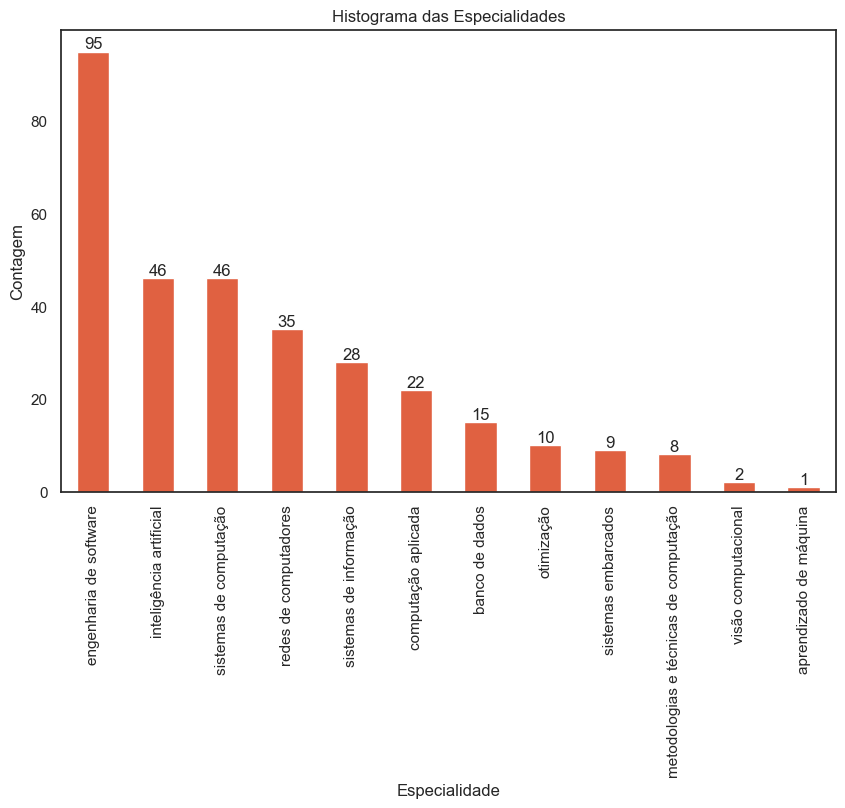

In [51]:
base = dados_poscomp[dados_poscomp['total'] <= 17]

plt.figure(figsize=(10, 6))
hist = base['ESPECIALIDADE'].value_counts().plot(kind='bar')

for i, v in enumerate(base['ESPECIALIDADE'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Histograma das Especialidades')
plt.xlabel('Especialidade')
plt.ylabel('Contagem')

plt.show()

In [52]:
base['ESPECIALIDADE'].value_counts()[:5]

ESPECIALIDADE
engenharia de software     95
inteligência artificial    46
sistemas de computação     46
redes de computadores      35
sistemas de informação     28
Name: count, dtype: int64

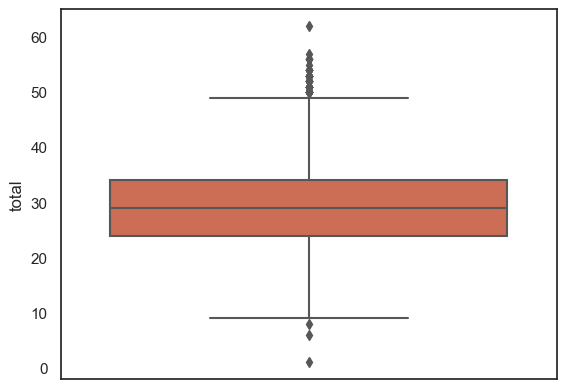

In [53]:
sns.boxplot(y=dados_poscomp["total"]);

#### Técnica para eliminar os outlier

In [54]:
df = dados_poscomp.copy()

In [55]:
def check_outlier(value, quantiles, amplitude):
    if (value < quantiles[0] - (1 * amplitude)) or (value > quantiles[2] + (1 * amplitude)):
        return True
    return False

In [56]:
# quartis das quantidades de caracteres dos títulos
import statistics

quantiles_title = statistics.quantiles(df["total"])
print("Quartis de nota:", quantiles_title)

# amplitude interquartil das quantidades de caracteres dos títulos

amplitude_title = quantiles_title[2] - quantiles_title[0]
print("Amplitude interquartil de nota:", amplitude_title)

# determinação dos outliers nos títulos

df["outlier_nota"] = df["total"].map(lambda x: check_outlier(
    value=x,
    quantiles=quantiles_title,
    amplitude=amplitude_title
))

Quartis de nota: [24.0, 29.0, 34.0]
Amplitude interquartil de nota: 10.0


In [57]:
df["outlier_nota"].value_counts()

outlier_nota
False    8031
True      317
Name: count, dtype: int64

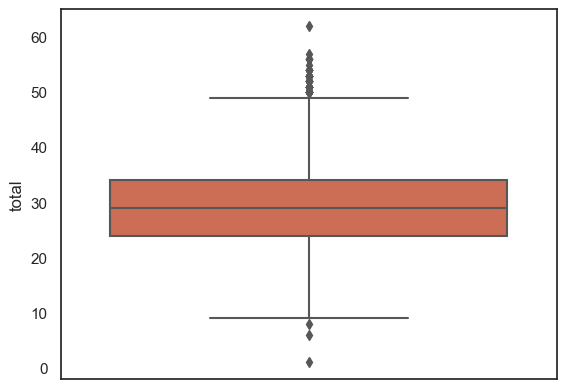

In [58]:
sns.boxplot(y=df["total"]);

In [59]:
df = df.loc[~((df["outlier_nota"]))]
df = df.iloc[:,:-1]
df.shape

(8031, 40)

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Matemática Discreta,8031.0,1.192504,0.806294,0.0,1.0,1.0,2.0,3.0
Cálculo Diferencial e Integral,8031.0,1.060640,0.803748,0.0,1.0,1.0,2.0,3.0
Álgebra Linear,8031.0,1.242809,0.956496,0.0,0.0,1.0,2.0,3.0
Geometria Analítica,8031.0,0.985058,0.877291,0.0,0.0,1.0,2.0,3.0
Análise Combinatória,8031.0,1.155647,0.869824,0.0,1.0,1.0,2.0,3.0
Probabilidade e Estatística,8031.0,0.803387,0.683241,0.0,0.0,1.0,1.0,2.0
Lógica Matemática,8031.0,1.280413,0.856337,0.0,1.0,1.0,2.0,3.0
Organização de Arquivos e Dados,8031.0,0.746980,0.747421,0.0,0.0,1.0,1.0,3.0
Técnicas de Programação,8031.0,2.180799,0.719198,0.0,2.0,2.0,3.0,3.0
Circuitos Digitais,8031.0,1.212800,0.836089,0.0,1.0,1.0,2.0,3.0


In [61]:
print(f'Perda - {(374 / 9849) * 100:.2f}% dos dados') # informação importante

Perda - 3.80% dos dados


In [62]:
nova_dados_poscomp = dados_poscomp[dados_poscomp['total'] >= 17]

In [63]:
nova_dados_poscomp = nova_dados_poscomp.drop(['NOME','PRESENTE','CARGO', 'ANO'], axis=1)

In [64]:
df = df.drop(['PRESENTE','CARGO', 'ANO'], axis=1)

In [65]:
nova_dados_poscomp.to_csv('dados/df_poscompTeste.csv', index=False)

## Verificar o comportamento dos candidatos de acordo com a linha de pesquisa

In [66]:
nova_dados_poscomp.head()

,SEXO,ESTADO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,Probabilidade e Estatística,Lógica Matemática,...,Processamento de Imagens,Banco de Dados,IDADE,matematica,fund_computacao,tec_computacao,total,linhas_pesquisas,area_concentration,REGIAO
INSCRICAO,,,,,,,,,,,,,,,,,,,,,
39401663587-8,M,RS,metodologias e técnicas de computação,3.0,2.0,3.0,2.0,2.0,2.0,2.0,...,2.0,1.0,21,16.0,22.0,12.0,50.0,redes de computadores,computacao,sul
39401651770-6,M,SP,engenharia de software,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,2.0,1.0,25,4.0,16.0,8.0,28.0,engenharia de software,informatica,sudeste
39401671273-0,M,PA,sistemas de informação,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,30,4.0,13.0,7.0,24.0,redes de computadores,computacao,norte
39401670049-5,M,MS,sistemas de computação,1.0,2.0,3.0,1.0,1.0,2.0,2.0,...,1.0,0.0,21,12.0,20.0,11.0,43.0,linhas concentradas,informatica,centro_oeste
39401665284-9,M,PB,metodologias e técnicas de computação,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,1.0,1.0,25,9.0,17.0,11.0,37.0,redes de computadores,computacao,nordeste


In [67]:
nova_dados_poscomp['area_concentration'].value_counts()

area_concentration
computacao     4380
informatica    3770
Name: count, dtype: int64

In [68]:
# plt.figure(figsize=(20, 15))
# plot = sns.lmplot(x="total", y="total", data=dados_poscomp, fit_reg=False, hue='linhas_pesquisas', legend=False)

# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
# plt.show()